In [2]:
import matplotlib.pyplot as plt

In [3]:
def print_tsp_sample(file_path, num_lines=10):
    with open(file_path, 'r') as file:
        for i, line in enumerate(file):
            if i >= num_lines:
                break
            print(line.strip())

file_path = 'zi929.tsp'
print_tsp_sample(file_path, num_lines=10)        

NAME : zi929
COMMENT : 929 locations in Zimbabwe
COMMENT : Derived from National Imagery and Mapping Agency data
TYPE : TSP
DIMENSION : 929
EDGE_WEIGHT_TYPE : EUC_2D
NODE_COORD_SECTION
1 15700.0000 30316.6667
2 16033.3333 28850.0000
3 16200.0000 31583.3333


In [4]:
def read_tsp_file(file_path):
    nodes = []
    with open(file_path, 'r') as file:
        lines = file.readlines()
        start_reading = False
        for line in lines:
            if "NODE_COORD_SECTION" in line:
                start_reading = True
                continue
            if start_reading:
                if line.strip() == "EOF":
                    break
                parts = line.split()
                node_id, x, y = int(parts[0]), float(parts[1]), float(parts[2])
                nodes.append((x, y))
    return nodes

In [5]:
def plot_tsp(nodes, show_path=False):
    x_coords, y_coords = zip(*nodes)
    plt.scatter(x_coords, y_coords, color='blue', label='Cities',s = 1)
    
    if show_path:
        # Connect points in the order they appear
        #plt.plot(x_coords, y_coords, color='red', linestyle='-', linewidth=0.5)
        pass
    
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.title("TSP Tour Visualization")
    plt.legend()
    plt.show()

In [6]:
file_path = 'zi929.tsp'
nodes = read_tsp_file(file_path)

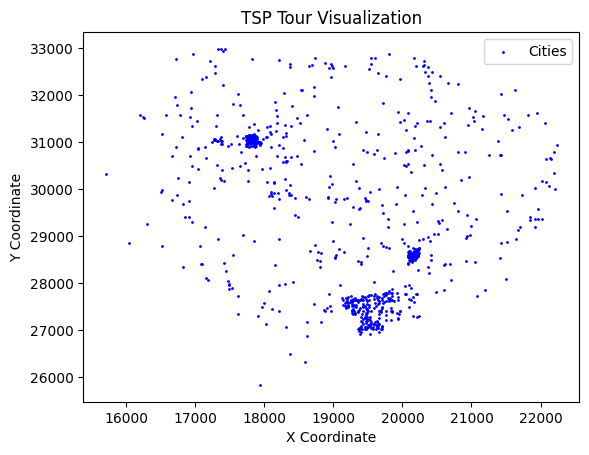

In [7]:
plot_tsp(nodes, show_path=True)

In [8]:
print(nodes)
print(len(nodes))

[(15700.0, 30316.6667), (16033.3333, 28850.0), (16200.0, 31583.3333), (16233.3333, 31533.3333), (16250.0, 31516.6667), (16300.0, 29250.0), (16500.0, 29933.3333), (16516.6667, 28800.0), (16516.6667, 29983.3333), (16516.6667, 31183.3333), (16566.6667, 31583.3333), (16666.6667, 29766.6667), (16666.6667, 30700.0), (16700.0, 31966.6667), (16716.6667, 30900.0), (16716.6667, 32766.6667), (16733.3333, 29883.3333), (16733.3333, 31783.3333), (16750.0, 30233.3333), (16783.3333, 31583.3333), (16800.0, 31116.6667), (16816.6667, 28350.0), (16816.6667, 29683.3333), (16850.0, 29416.6667), (16900.0, 29416.6667), (16900.0, 29750.0), (16900.0, 30150.0), (16916.6667, 30700.0), (16916.6667, 31533.3333), (16933.3333, 31716.6667), (16933.3333, 32066.6667), (16950.0, 29300.0), (16950.0, 30500.0), (16950.0, 31333.3333), (16966.6667, 32866.6667), (17016.6667, 31450.0), (17033.3333, 30433.3333), (17033.3333, 30850.0), (17033.3333, 30866.6667), (17066.6667, 28800.0), (17083.3333, 28400.0), (17100.0, 28400.0), (17

In [ ]:
def find_distance(x1,y1,x2,y2):
    distance = (((x1-x2)**2)+((y1-y2)**2))**0.5
    return distance

In [20]:
box = []
num = len(nodes)
for i in range(num):
    arrey = []
    for j in range(num):
        arrey.append(find_distance(nodes[i][0],nodes[i][1],nodes[j][0],nodes[j][1]))
    box.append(arrey)

print(box[2])


[1361.7798190440155, 2738.409888562662, 0.0, 60.092502767733144, 83.33328000000706, 2335.4751741110167, 1677.0509831248423, 2801.2893563103707, 1631.0358055201887, 510.174282857232, 366.6667000000016, 1875.6479798844025, 999.0272908073025, 630.0353129433004, 856.6731452413923, 1291.2096709847162, 1781.6970586743664, 569.6002184768614, 1457.7379737113251, 583.3332999999984, 760.1169091367176, 3291.613897129761, 1997.567976037084, 2262.066346408864, 2276.937450953703, 1962.424772797389, 1595.1314519151344, 1137.4923638327334, 718.4087686609151, 745.3559716299645, 878.287483939314, 2403.354106012862, 1317.615664330417, 790.5694150420949, 1494.8988074262622, 827.4794666804622, 1420.1916732923366, 1110.0550066450649, 1099.1157375110424, 2915.142436962176, 3303.6175047631905, 3308.1128908924616, 1182.2765450134298, 2559.5680627359316, 1156.7434667106509, 3594.4787265409623, 1320.1430435962438, 1241.974234837422, 3651.559715305834, 1522.5162640985022, 1186.6151220078796, 1881.5626082830445, 1

In [ ]:
# Python program for Dijkstra's single
# source shortest path algorithm. The program is
# for adjacency matrix representation of the graph

# Library for INT_MAX
import sys


class Graph():

    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)]
                      for row in range(vertices)]

    def printSolution(self, dist):
        print("Vertex \tDistance from Source")
        for node in range(self.V):
            print(node, "\t", dist[node])

    # A utility function to find the vertex with
    # minimum distance value, from the set of vertices
    # not yet included in shortest path tree
    def minDistance(self, dist, sptSet):

        # Initialize minimum distance for next node
        min = sys.maxsize

        # Search not nearest vertex not in the
        # shortest path tree
        for u in range(self.V):
            if dist[u] < min and sptSet[u] == False:
                min = dist[u]
                min_index = u

        return min_index

    # Function that implements Dijkstra's single source
    # shortest path algorithm for a graph represented
    # using adjacency matrix representation
    def dijkstra(self, src):

        dist = [sys.maxsize] * self.V
        dist[src] = 0
        sptSet = [False] * self.V
        way = []
        for cout in range(self.V):

            # Pick the minimum distance vertex from
            # the set of vertices not yet processed.
            # x is always equal to src in first iteration
            x = self.minDistance(dist, sptSet)

            # Put the minimum distance vertex in the
            # shortest path tree
            sptSet[x] = True

            # Update dist value of the adjacent vertices
            # of the picked vertex only if the current
            # distance is greater than new distance and
            # the vertex in not in the shortest path tree
            for y in range(self.V):
                if self.graph[x][y] > 0 and sptSet[y] == False and \
                        dist[y] > dist[x] + self.graph[x][y]:
                    dist[y] = dist[x] + self.graph[x][y]

        self.printSolution(dist)


In [25]:
g = Graph(929)
g.graph = box
g.dijkstra(2)

Vertex 	Distance from Source
0 	 1361.7798190440155
1 	 2738.409888562662
2 	 0
3 	 60.092502767733144
4 	 83.33328000000706
5 	 2335.4751741110167
6 	 1677.0509831248423
7 	 2801.2893563103707
8 	 1631.0358055201887
9 	 510.174282857232
10 	 366.6667000000016
11 	 1875.6479798844025
12 	 999.0272908073025
13 	 630.0353129433004
14 	 856.6731452413923
15 	 1291.2096709847162
16 	 1781.6970586743664
17 	 569.6002184768614
18 	 1457.7379737113251
19 	 583.3332999999984
20 	 760.1169091367176
21 	 3291.613897129761
22 	 1997.567976037084
23 	 2262.066346408864
24 	 2276.937450953703
25 	 1962.424772797389
26 	 1595.1314519151344
27 	 1137.4923638327334
28 	 718.4087686609151
29 	 745.3559716299645
30 	 878.287483939314
31 	 2403.354106012862
32 	 1317.615664330417
33 	 790.5694150420949
34 	 1494.8988074262622
35 	 827.4794666804622
36 	 1420.1916732923366
37 	 1110.0550066450649
38 	 1099.1157375110424
39 	 2915.142436962176
40 	 3303.6175047631905
41 	 3308.1128908924616
42 	 1182.27654